Initially, the goal is to load and explore the CPU and Memory time series for the POD **91** of the microservice **68185**.



### CPU CSV Load

In [1]:
import pandas as pd

# Load the dataset
file_path = '/home/simone/Documents/Work/University/3 year/2 semester/Research Project 27794/code/MS_68185_POD_91_CPU.csv'
data = pd.read_csv(file_path, parse_dates=True)

# Display the first few rows of t, parse_dates=Truehe dataset
data.head()


,timestamp,cpu_utilization
0,0,0.190373
1,60000,0.183195
2,120000,0.173558
3,180000,0.168516
4,240000,0.170707


### Memory CSV Load

In [2]:
import pandas as pd

# Load the dataset
file_path = '/home/simone/Documents/Work/University/3 year/2 semester/Research Project 27794/code/MS_68185_POD_91_Memory.csv'
data_memory = pd.read_csv(file_path, parse_dates=True)

# Display the first few rows of t, parse_dates=Truehe dataset
data_memory.head()


,timestamp,memory_utilization
0,0,0.662515
1,60000,0.662292
2,120000,0.662423
3,180000,0.662563
4,240000,0.662420


The timestamp is represented as the recording interval of 60 seconds (60 * 1000). The main goal is to convert the timestamp into the format of DD-MM-YYYY HH:MM:SS It's a convention to use 01/01/2022 as the selected starting date and add the seconds in the timestamp to it.

### CPU CVS Timestamp Conversion

In [3]:
# Convert the timestamp to the desired format
# Start date is 01/01/2022
start_date = pd.Timestamp('2022-01-01')

# Convert the timestamp from milliseconds to seconds and add it to the start date
data['timestamp'] = data['timestamp'].apply(lambda x: start_date + pd.Timedelta(seconds=x/1000))


# Display the first few rows of the modified dataset
data.head()

,timestamp,cpu_utilization
0,2022-01-01 00:00:00,0.190373
1,2022-01-01 00:01:00,0.183195
2,2022-01-01 00:02:00,0.173558
3,2022-01-01 00:03:00,0.168516
4,2022-01-01 00:04:00,0.170707


### Memory CVS Timestamp Conversion

In [4]:
# Convert the timestamp to the desired format
# Start date is 01/01/2022
start_date = pd.Timestamp('2022-01-01')

# Convert the timestamp from milliseconds to seconds and add it to the start date
data_memory['timestamp'] = data_memory['timestamp'].apply(lambda x: start_date + pd.Timedelta(seconds=x/1000))


# Display the first few rows of the modified dataset
data_memory.head()

,timestamp,memory_utilization
0,2022-01-01 00:00:00,0.662515
1,2022-01-01 00:01:00,0.662292
2,2022-01-01 00:02:00,0.662423
3,2022-01-01 00:03:00,0.662563
4,2022-01-01 00:04:00,0.662420


## CPU Line Plot¶

In this plot, time is shown on the x-axis with CPU utilization values along the y-axis.

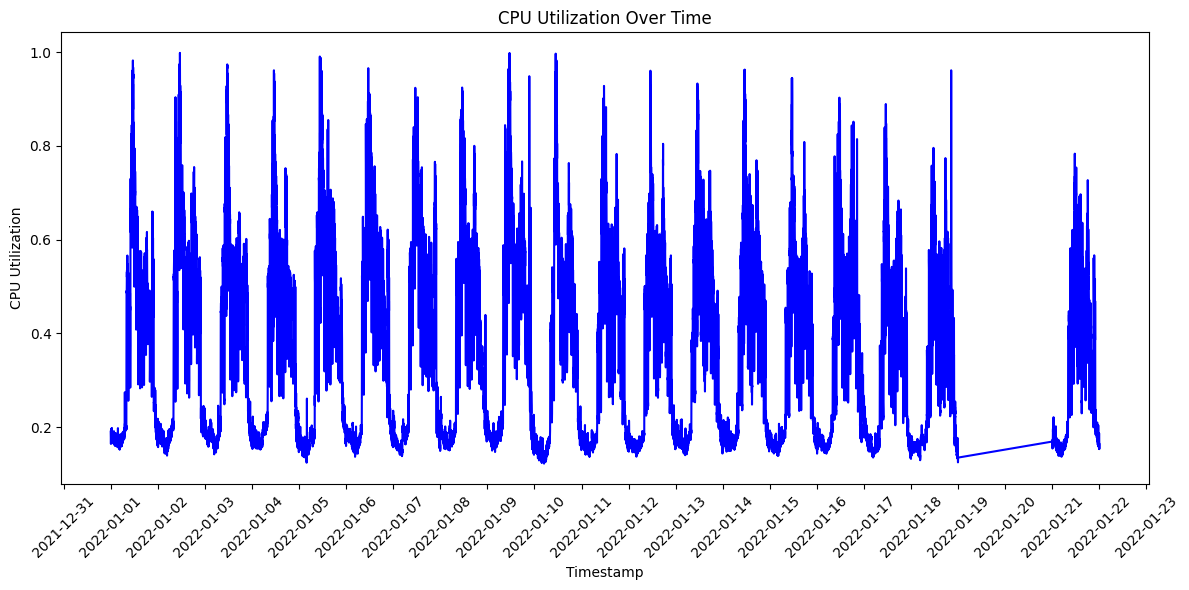

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting the time series
plt.figure(figsize=(12, 6))
# Converting the columns to NumPy arrays
numpy_array_timestamp = data['timestamp'].to_numpy()
numpy_array_cpu = data['cpu_utilization'].to_numpy()
plt.plot(numpy_array_timestamp, numpy_array_cpu, color='blue')
# Formatting the timestamp on the x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set tick for each day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('CPU Utilization Over Time')
plt.xlabel('Timestamp')
plt.ylabel('CPU Utilization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Memory Line Plot

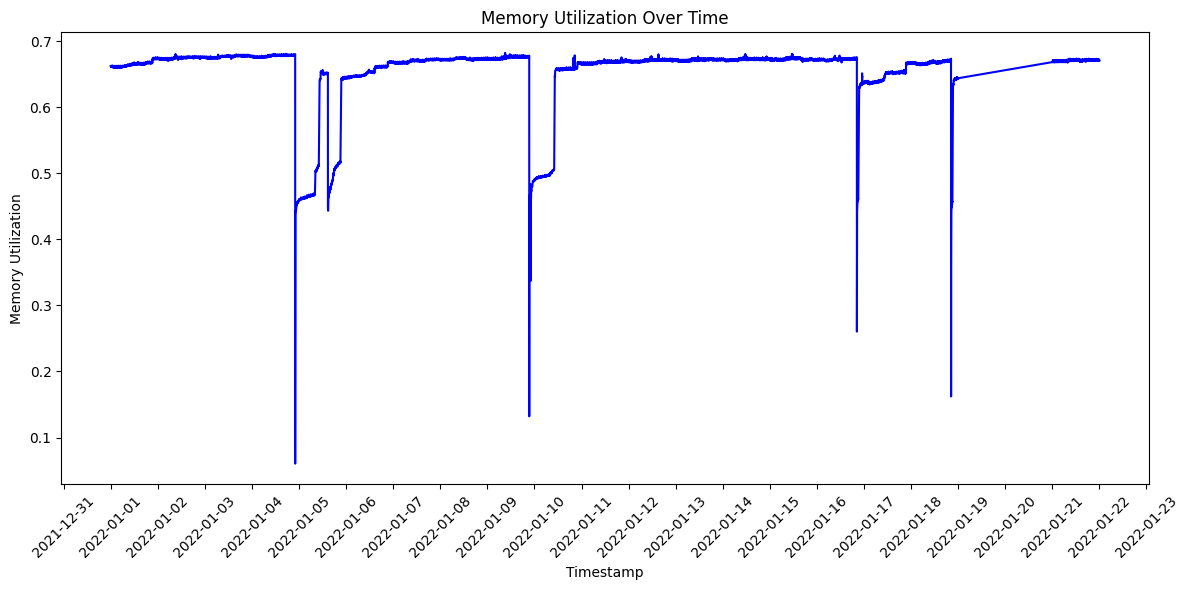

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting the time series
plt.figure(figsize=(12, 6))
# Converting the columns to NumPy arrays
numpy_array_timestamp = data_memory['timestamp'].to_numpy()
numpy_array_memory = data_memory['memory_utilization'].to_numpy()
plt.plot(numpy_array_timestamp, numpy_array_memory, color='blue')
# Formatting the timestamp on the x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set tick for each day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Memory Utilization Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Memory Utilization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## CPU Utilization Plot by Day

It can be helpful to compare CPU line plots for the same interval, in this case day-to-day.

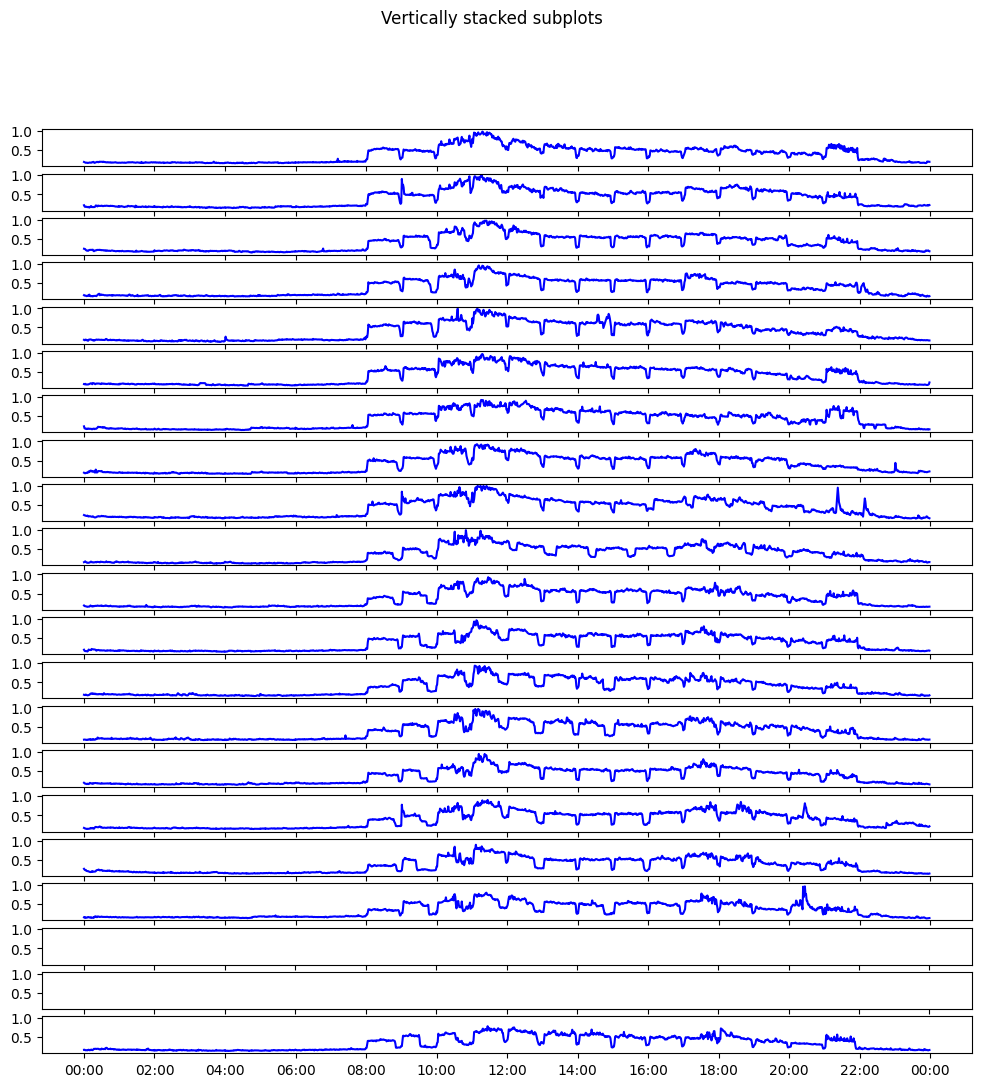

In [7]:
from pandas import DataFrame
import matplotlib.dates as mdates

# applying groupby 
group_by_day = data.groupby(pd.Grouper(key='timestamp', axis=0,  freq='D', sort=True))
fig, axs = plt.subplots(len(group_by_day), figsize = (12,12), sharey=True)
fig.suptitle('Vertically stacked subplots')
i = 0
for group in group_by_day:
    day_ds = group[1]
    # Converting the columns to NumPy arrays
    numpy_array_timestamp = day_ds['timestamp'].to_numpy()
    numpy_array_cpu = day_ds['cpu_utilization'].to_numpy()
    axs[i].xaxis.set_major_locator(mdates.HourLocator(byhour=range(24), interval=2))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axs[i].plot(numpy_array_timestamp, numpy_array_cpu, color='blue')
    i += 1


    

    

## Memory Utilization Plot by Day

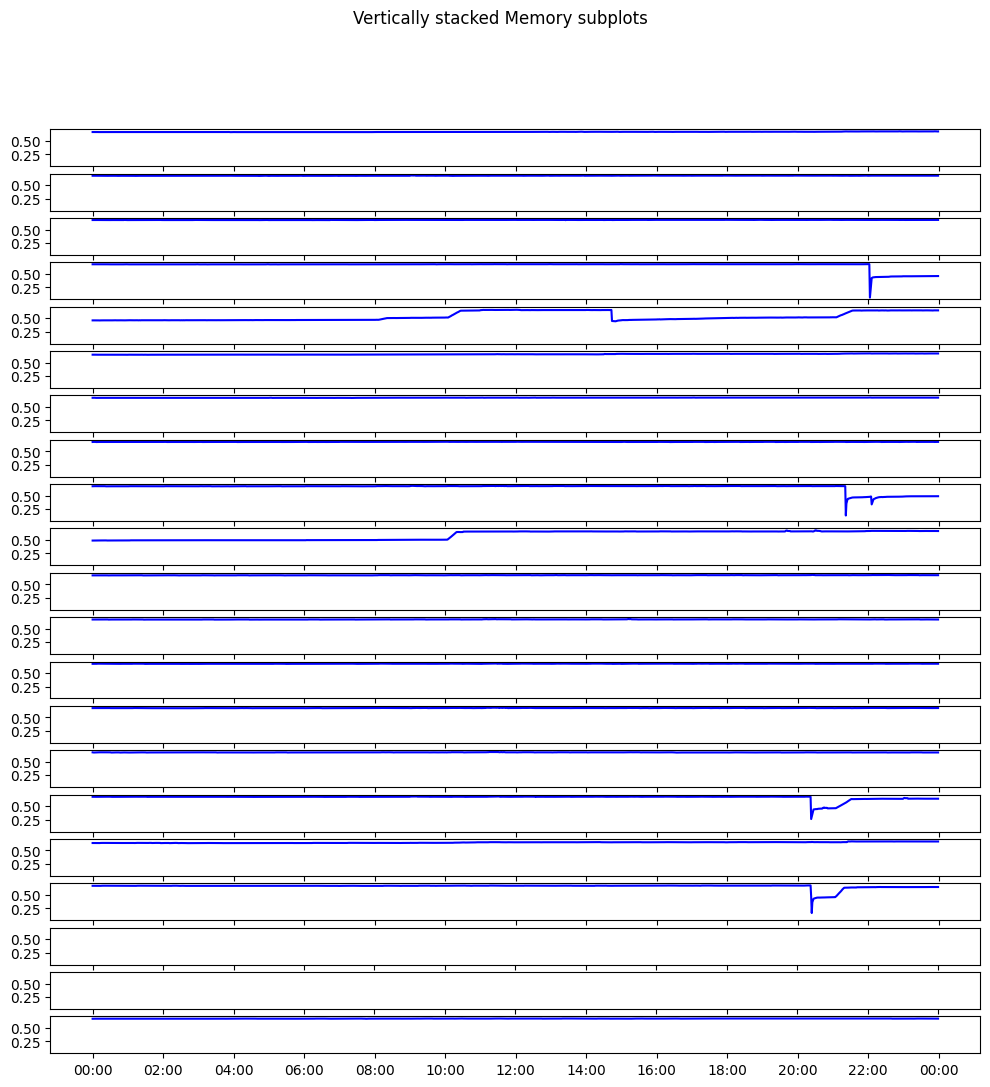

In [8]:
from pandas import DataFrame
import matplotlib.dates as mdates

# applying groupby 
group_memory_by_day = data_memory.groupby(pd.Grouper(key='timestamp', axis=0,  freq='D', sort=True))
fig, axs = plt.subplots(len(group_memory_by_day), figsize = (12,12), sharey=True)
fig.suptitle('Vertically stacked Memory subplots')
i = 0
for group in group_memory_by_day:
    day_ds = group[1]
    # Converting the columns to NumPy arrays
    numpy_array_timestamp = day_ds['timestamp'].to_numpy()
    numpy_array_memory = day_ds['memory_utilization'].to_numpy()
    axs[i].xaxis.set_major_locator(mdates.HourLocator(byhour=range(24), interval=2))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axs[i].plot(numpy_array_timestamp, numpy_array_memory, color='blue')
    i += 1


    

    

## Histogram of CPU utilization

One useful way to visualize data is through a plot of the values without considering their temporal order. This type of visualization is known as the distribution of observations. A histogram is a type of distribution plot that groups CPU utilization values into bins. By counting the frequency of observations within each bin, we can gain insights into the distribution of the underlying data.

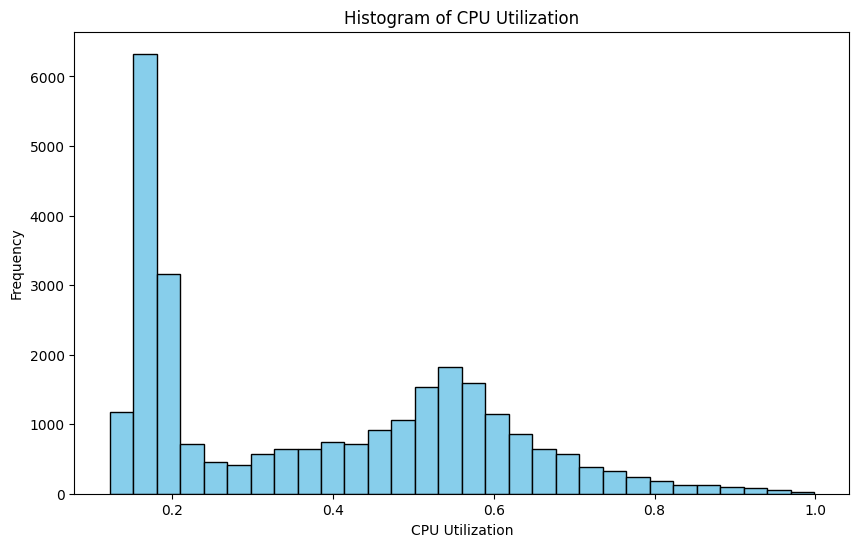

In [9]:
# Plotting the histogram of the CPU utilization
plt.figure(figsize=(10, 6))
plt.hist(data['cpu_utilization'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of CPU Utilization')
plt.xlabel('CPU Utilization')
plt.ylabel('Frequency')
plt.show()


## Histogram of Memory utilization

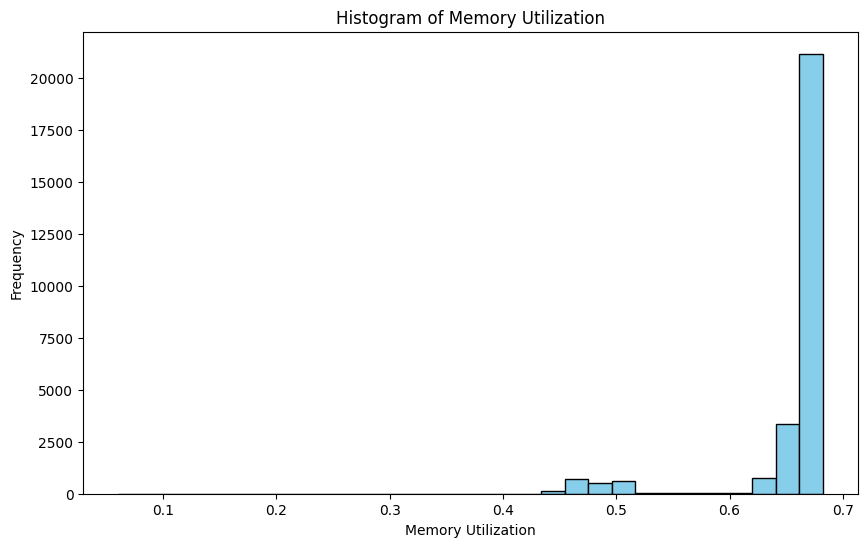

In [10]:
# Plotting the histogram of the CPU utilization
plt.figure(figsize=(10, 6))
plt.hist(data_memory['memory_utilization'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Memory Utilization')
plt.xlabel('Memory Utilization')
plt.ylabel('Frequency')
plt.show()


## CPU utilization Density Plot

To gain a better understanding of the distribution of observations, we can use a density plot. This is similar to a histogram, but instead of using bars, a smooth line is used to summarize the distribution of observations. A function is also used to fit the distribution of observations, resulting in a more accurate representation of the data.

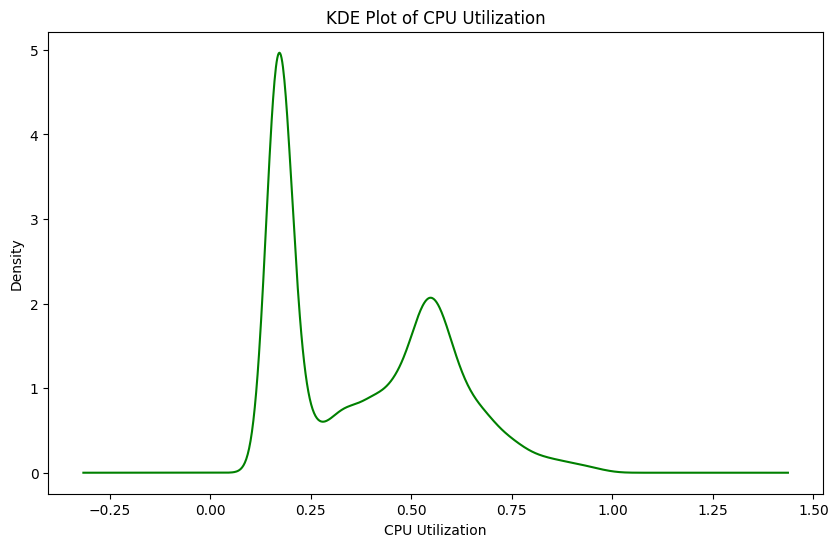

In [11]:
# Plotting the KDE (Kernel Density Estimate) of the CPU utilization
plt.figure(figsize=(10, 6))
data['cpu_utilization'].plot(kind='kde', color='green')
plt.title('KDE Plot of CPU Utilization')
plt.xlabel('CPU Utilization')
plt.ylabel('Density')
plt.show()


## Memory utilization Density Plot

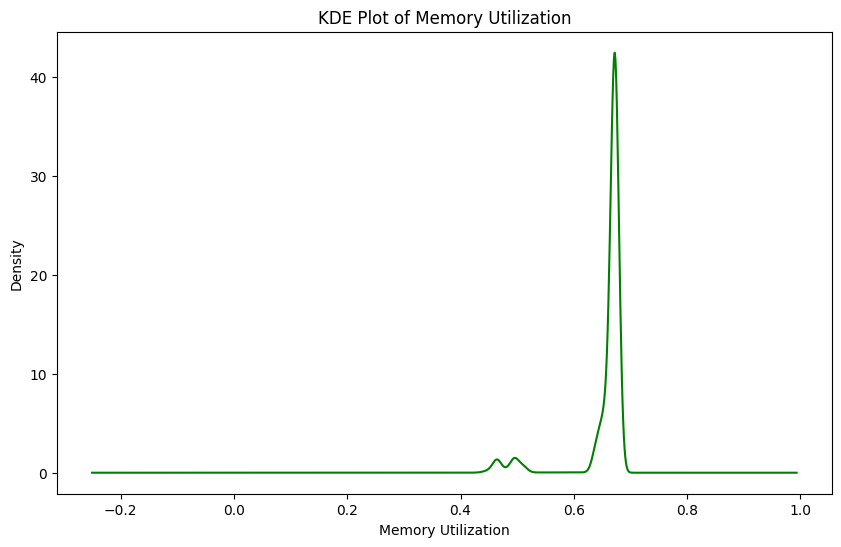

In [12]:
# Plotting the KDE (Kernel Density Estimate) of the Memory utilization
plt.figure(figsize=(10, 6))
data_memory['memory_utilization'].plot(kind='kde', color='green')
plt.title('KDE Plot of Memory Utilization')
plt.xlabel('Memory Utilization')
plt.ylabel('Density')
plt.show()


## Daily Box and Whisker Plots

<Figure size 1200x600 with 0 Axes>

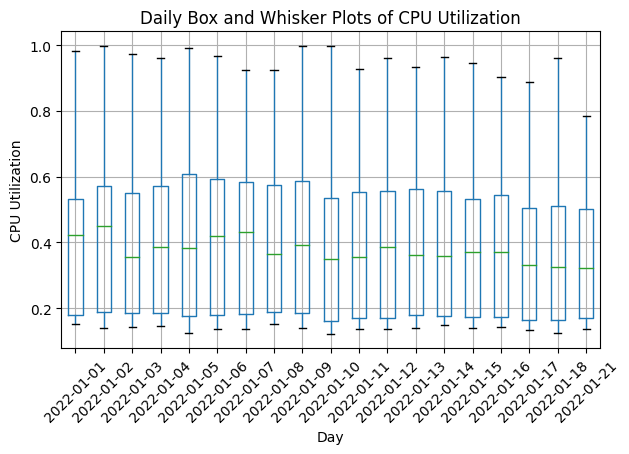

In [13]:
# Generating the daily Box and Whisker plots for the 'cpu_utilization' column
plt.figure(figsize=(12, 6))
# Grouping the data by day and aggregating
data['date'] = data['timestamp'].dt.date


data.boxplot(column='cpu_utilization', by='date', rot=45)
plt.title('Daily Box and Whisker Plots of CPU Utilization')
plt.xlabel('Day')
plt.ylabel('CPU Utilization')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by' title
plt.tight_layout()  # Adjust layout
plt.show()


<Figure size 1200x600 with 0 Axes>

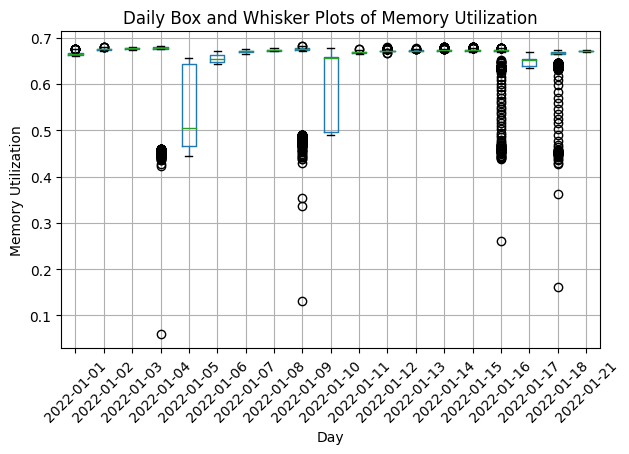

In [14]:
# Generating the daily Box and Whisker plots for the 'Memory_utilization' column
plt.figure(figsize=(12, 6))
# Grouping the data by day and aggregating
data_memory['date'] = data_memory['timestamp'].dt.date

data_memory.boxplot(column='memory_utilization', by='date', rot=45)
plt.title('Daily Box and Whisker Plots of Memory Utilization')
plt.xlabel('Day')
plt.ylabel('Memory Utilization')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by' title
plt.tight_layout()  # Adjust layout
plt.show()


## Heatmap of CPU Utilization

A matrix of numbers can be represented as a surface plot with a unique color assigned to each value. Heatmaps are useful for comparing observations across intervals.

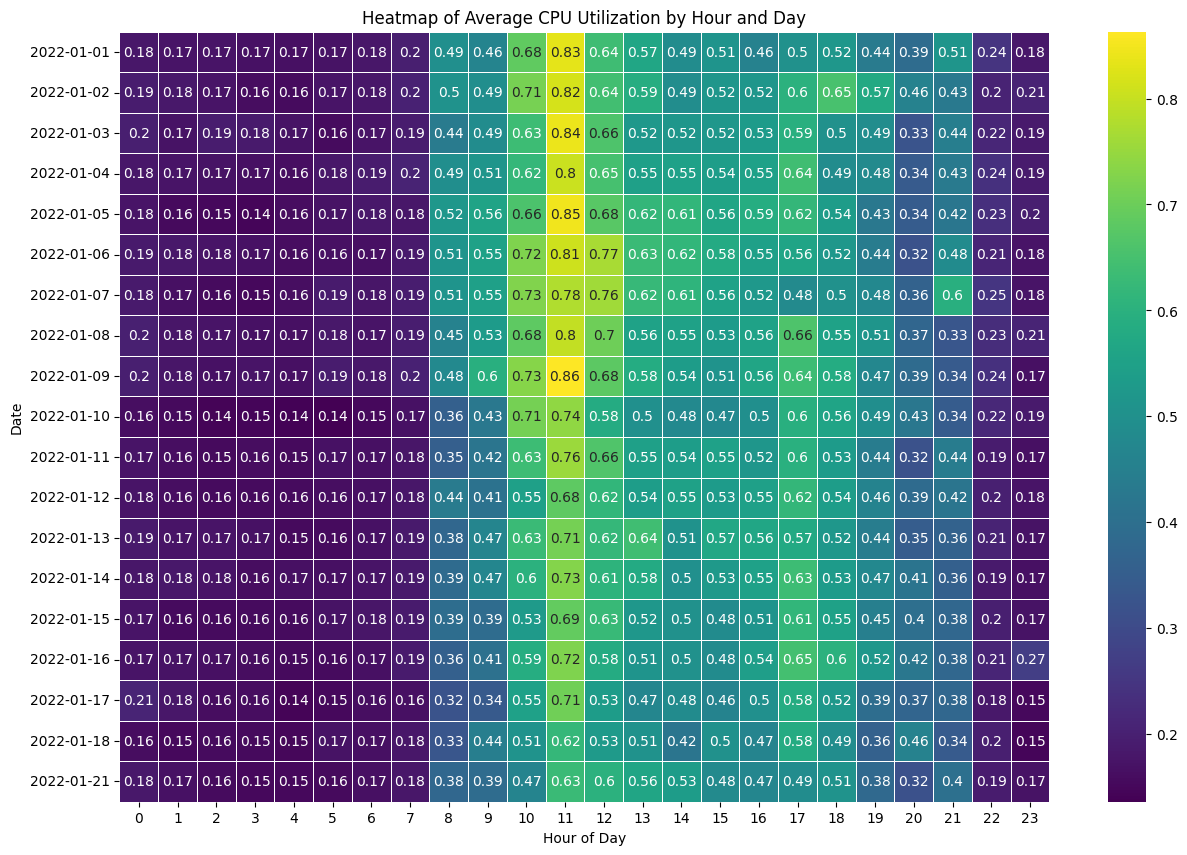

In [15]:
import seaborn as sns
import numpy as np

# Preparing data for the heatmap
# Creating a pivot table with hours and days
data['hour'] = data['timestamp'].dt.hour
pivot_data = data.pivot_table(values='cpu_utilization', index='date', columns='hour', aggfunc=np.mean)

# Plotting the heatmap again with Seaborn
plt.figure(figsize=(15, 10))
plt.title('Heatmap of Average CPU Utilization by Hour and Day')
sns.heatmap(pivot_data, cmap='viridis', linewidths=.5, annot=True)
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.show()


## Heatmap of Memory Utilization

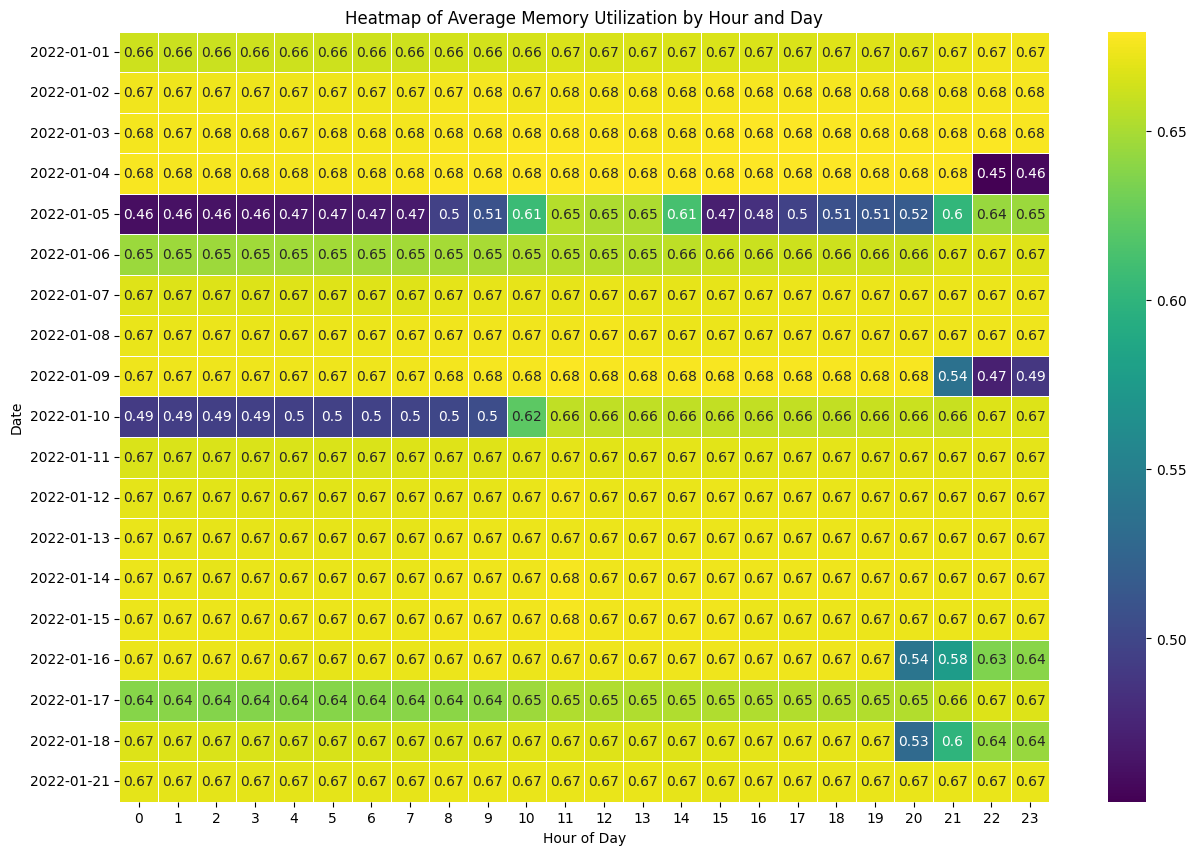

In [16]:
import seaborn as sns
import numpy as np

# Preparing data for the heatmap
# Creating a pivot table with hours and days
data_memory['hour'] = data_memory['timestamp'].dt.hour
pivot_memory_data = data_memory.pivot_table(values='memory_utilization', index='date', columns='hour', aggfunc=np.mean)

# Plotting the heatmap again with Seaborn
plt.figure(figsize=(15, 10))
plt.title('Heatmap of Average Memory Utilization by Hour and Day')
sns.heatmap(pivot_memory_data, cmap='viridis', linewidths=.5, annot=True)
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.show()


## CPU Utilization Lag Scatter Plot

Time series modeling is based on the assumption that there is a relationship between an observation and the previous observation. The previous observations in a time series are known as lags, with the observation at the previous time step referred to as lag1. A scatter plot is a useful type of plot to explore the relationship between each observation and a lag of that observation.

If the points on the scatter plot cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship. On the other hand, if the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.

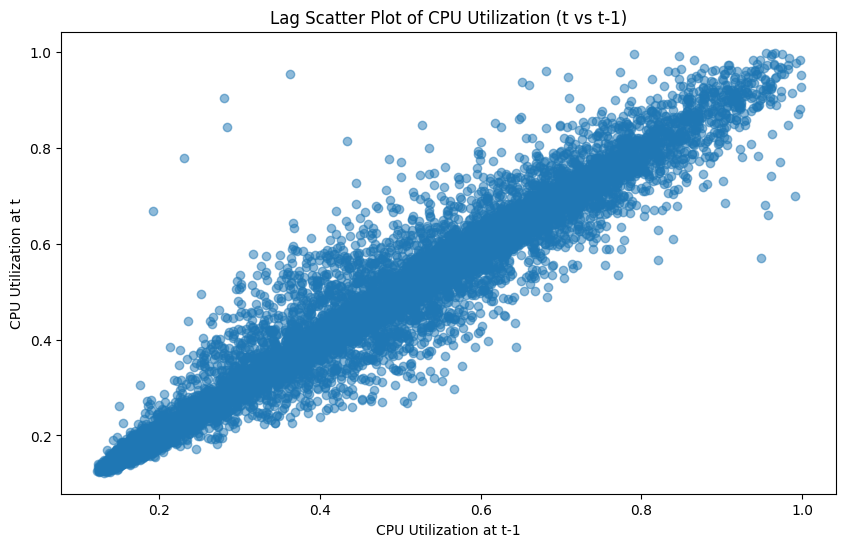

In [17]:
# Creating a Lag Scatter Plot to see the relationship with the observation at t-1 (previous time step)

# Creating a new column for the lagged values
data['lag_cpu_utilization'] = data['cpu_utilization'].shift(1)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['lag_cpu_utilization'][1:], data['cpu_utilization'][1:], alpha=0.5)
plt.title('Lag Scatter Plot of CPU Utilization (t vs t-1)')
plt.xlabel('CPU Utilization at t-1')
plt.ylabel('CPU Utilization at t')
plt.show()


## Memory Utilization Lag Scatter Plot

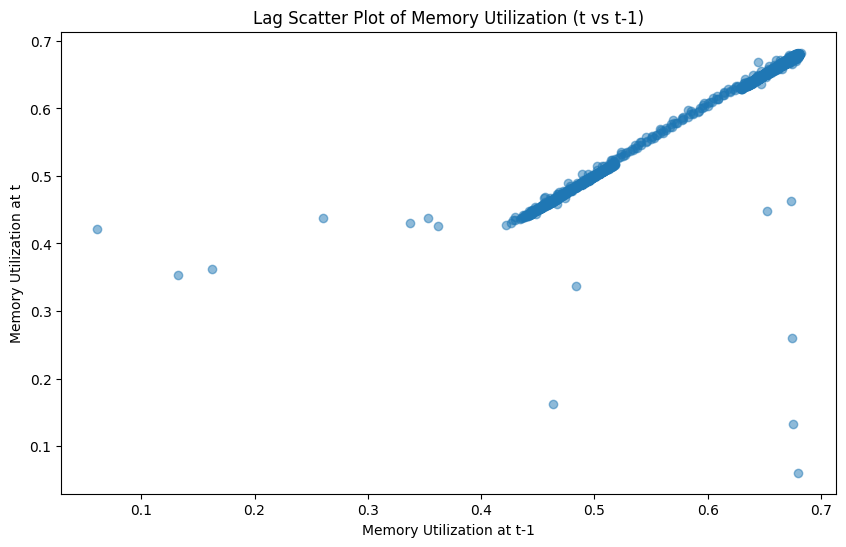

In [18]:
# Creating a Lag Scatter Plot to see the relationship with the observation at t-1 (previous time step)

# Creating a new column for the lagged values
data_memory['lag_memory_utilization'] = data_memory['memory_utilization'].shift(1)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_memory['lag_memory_utilization'][1:], data_memory['memory_utilization'][1:], alpha=0.5)
plt.title('Lag Scatter Plot of Memory Utilization (t vs t-1)')
plt.xlabel('Memory Utilization at t-1')
plt.ylabel('Memory Utilization at t')
plt.show()


## CPU Utilization Autocorrelation Plot

When we calculate a correlation value between two sets of numbers, such as observations and their lag=1 values, we get a number between -1 and 1. The sign of this number tells us whether the correlation is negative or positive, respectively. A value closer to zero suggests a weak correlation, while a value closer to -1 or 1 indicates a strong correlation. We can then plot the resulting data with lag on the x-axis and correlation on the y-axis.

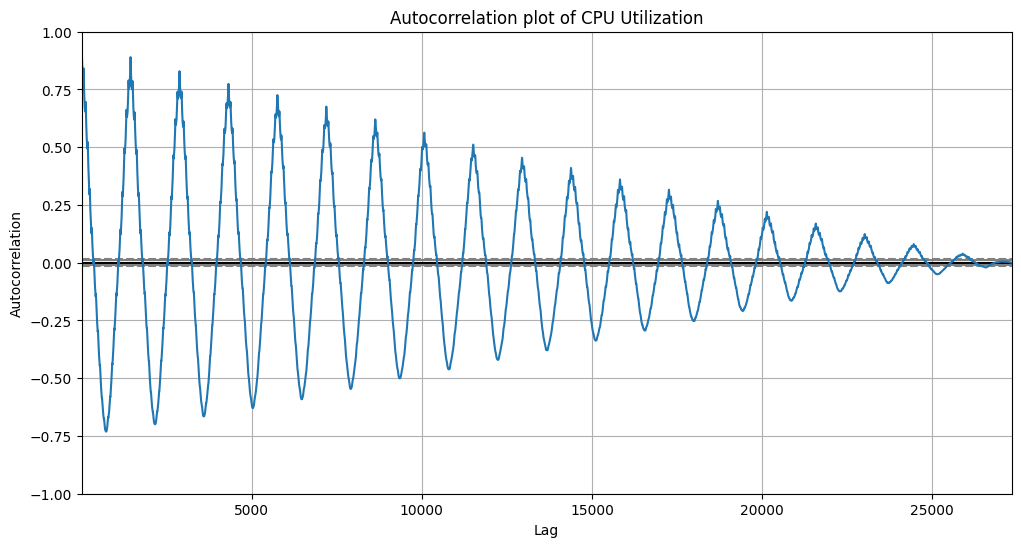

In [19]:
from pandas.plotting import autocorrelation_plot

# Plotting the autocorrelation plot for the 'cpu_utilization' column
plt.figure(figsize=(12, 6))
autocorrelation_plot(data['cpu_utilization'])
plt.title('Autocorrelation plot of CPU Utilization')
plt.show()


## Memory Utilization Autocorrelation Plot

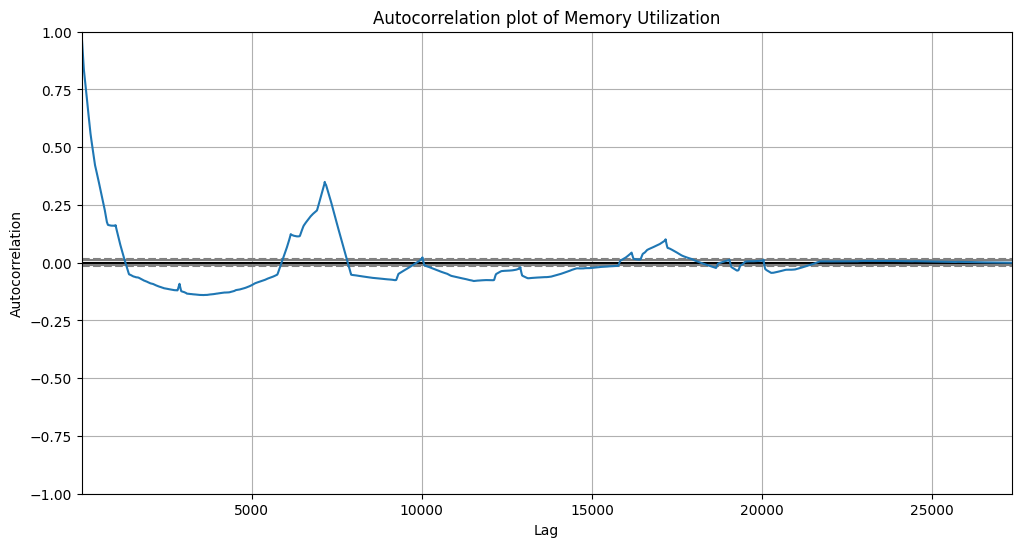

In [20]:
from pandas.plotting import autocorrelation_plot

# Plotting the autocorrelation plot for the 'cpu_utilization' column
plt.figure(figsize=(12, 6))
autocorrelation_plot(data_memory['memory_utilization'])
plt.title('Autocorrelation plot of Memory Utilization')
plt.show()


## Checks for CPU utilization Stationarity

In a stationary time series, the observations are not influenced by time. A time series is considered stationary if it does not have any trend or seasonal effects. The summary statistics calculated on the time series remain consistent over time, such as the mean or variance of the observations.

In [21]:
X = data['cpu_utilization'].values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print( ' mean1=%f, mean2=%f ' % (mean1, mean2))
print( ' variance1=%f, variance2=%f ' % (var1, var2))

 mean1=0.396221, mean2=0.368493 
 variance1=0.047533, variance2=0.037537 


## Checks for Memory utilization Stationarity

In [22]:
X = data_memory['memory_utilization'].values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print( ' mean1=%f, mean2=%f ' % (mean1, mean2))
print( ' variance1=%f, variance2=%f ' % (var1, var2))

 mean1=0.644260, mean2=0.665718 
 variance1=0.004243, variance2=0.000436 
